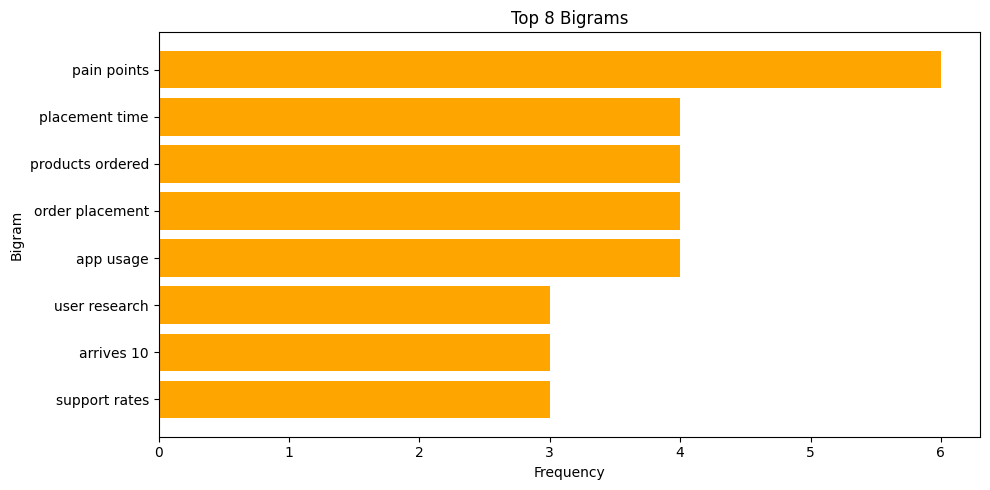

In [ ]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://medium.com/design-bootcamp/the-curious-case-of-zepto-ucd-308e7378099e'
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

    title_tag = soup.find('h1')
    title = title_tag.get_text(strip=True) if title_tag else 'No Title Found'

    article_tag = soup.find('article')
    paragraphs = article_tag.find_all('p') if article_tag else []
    article_text = ' '.join(p.get_text(strip=True) for p in paragraphs)

    with open("medium_article.txt", "w", encoding="utf-8") as file:
        file.write(f"{title}\n\n{article_text}")

    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
    X = vectorizer.fit_transform([article_text])
    bigram_counts = X.toarray().sum(axis=0)
    bigrams = vectorizer.get_feature_names_out()

    df_bigrams = pd.DataFrame({'ngram': bigrams, 'count': bigram_counts})
    df_top8 = df_bigrams.sort_values(by='count', ascending=False).head(8)

    plt.figure(figsize=(10, 5))
    plt.barh(df_top8['ngram'][::-1], df_top8['count'][::-1], color='orange')
    plt.xlabel("Frequency")
    plt.ylabel("Bigram")
    plt.title("Top 8 Bigrams")
    plt.tight_layout()
    plt.show()

else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")